# เทอร์โมไดนามิกส์ไดอะแกรม
* เทอร์โมไดนามิกส์ไดอะแกรมสามารถนำไปใช้ศึกษาสภาพอากาศที่รุนแรง เช่น พายุลูกเห็บ พายุฤดูร้อน พายุฝนฟ้าคะนอง 
* ดังนั้นไดอะแกรม skew-T/logP  จึงมีความสำคัญมากต่อการวิเคราะห์ลักษณะทางกายภาพของบรรยากาศที่เอื้อให้เกิดสภาวะอากาศที่รุนแรง
* นิสิตสามารถนำผลที่ได้จากการวิเคราะห์เทอร์โมไดนามิกส์มาร่วมวิเคราะห์กับข้อมูลรีโมทเซนซิ่ง เช่น เรดาร์ตรวจอากาศและดาวเทียมอินฟราเรดในช่วงอากาศที่รุนแรงได้

ยูทูปชาแนลและแหล่งเรียนรู้ออนไลน์ที่นิสิตควรศึกษาทางด้านบรรยากาศศาสตร์ ได้แก่
* Dr.kevin Perry จากมหาวิทยาลัย Utah สอนเรื่องบรรยากาศศาสตร์ https://www.youtube.com/channel/UCktw_bKshmipG9QH_pgMkLw/videos
* Prof.Dr.Ronald Smith จากมหาวิทยาลัยYale เรื่องThe Atmosphere, the Ocean, and Environmental Change  https://oyc.yale.edu/geology-and-geophysics/gg-140
* หนังสือฟรี อุตุนิยมวิทยาภาคปฏิบัติ สอนการคำนวณของ Prof.Roland Stull https://www.eoas.ubc.ca/books/Practical_Meteorology/


## 1.การพลอต skew-T/logP 
จากเวป metpy ยูทูป  https://www.youtube.com/watch?v=oog6_b-844Q&list=PLQut5OXpV-0ir4IdllSt1iEZKTwFBa7kO&index=11

In [1]:
from datetime import datetime #datetime object
from siphon.simplewebservice.wyoming import WyomingUpperAir
from metpy.units import units


In [2]:
# ค้นหาข่าวพายุฤดูร้อนหรือพายุลูกเห็บในเชียงใหม่ เพื่อระบุวันที่มีเหตุการณ์รุนแรงดังกล่าว พบว่าช่วง 16-18 เมษายน 2561 มีพายุดังกล่าวเกิดในเชียงใหม่
# ข่าวอ้างอิง https://www.khaosod.co.th/special-stories/news_965984  และ https://news.thaipbs.or.th/content/271711
# อย่างไรก็ตาม ข้อมูล upper air ใช้ได้สองวันคือ 16 และ 18 เมษายน ส่วนวันที่ 17 เมษายน ดูเหมือนข้อมูลไม่สมบูรณ์
date = datetime(2018, 4, 18, 0) 
station = 'VTCC' #สถานีจ.เชียงใหม่ จากเวป https://weather.uwyo.edu/upperair/sounding.html  
df = WyomingUpperAir.request_data(date, station) # ดึงข้อมูลตามวันเวลาและสถานีเข้ามาเก็บใน dataframe ของ pandas

In [3]:
# เก็บค่าอื่นๆ ที่ต้องใช้ในการพลอตค่า sounding ใน skew-T/log P ไดอะแกรม
p = df['pressure'].values * units(df.units['pressure'])
T = df['temperature'].values * units(df.units['temperature'])
Td = df['dewpoint'].values * units(df.units['dewpoint'])
u = df['u_wind'].values * units(df.units['u_wind'])
v = df['v_wind'].values * units(df.units['v_wind'])

In [4]:
import matplotlib.pyplot as plt
import metpy.plots as plots

%matplotlib inline

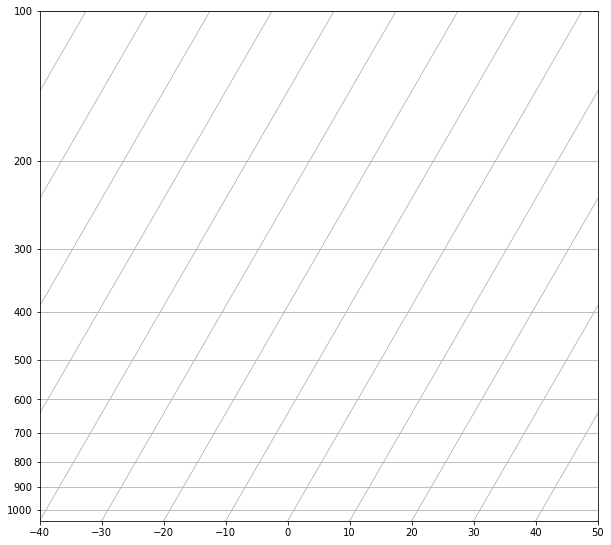

In [5]:
fig = plt.figure(figsize=(10,10))
skew = plots.SkewT(fig)

อุณหภูมิในแนวแกน X ที่มีเส้นเอียงไปทางบนขวา ส่วนความกดอากาศอยู่ในระบบ log ในแกน y

In [6]:
# พลอตความกดอากาศและอุณหภูมิ
skew.plot(p, T, 'red')

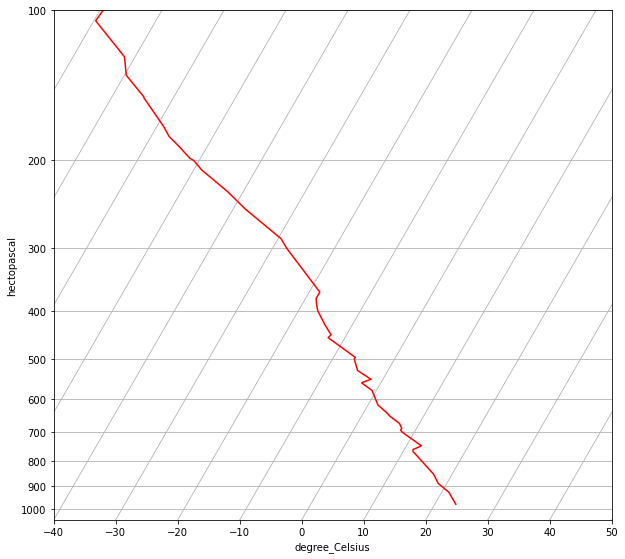

In [8]:
fig

เส้นสีแดงคือ อุณหภูมิ ต่อไปจะพลอตค่า dewpoint

In [9]:
# พลอต Td หรือ อุณหภูมิจุดน้ำค้าง
skew.plot(p, Td, 'green')

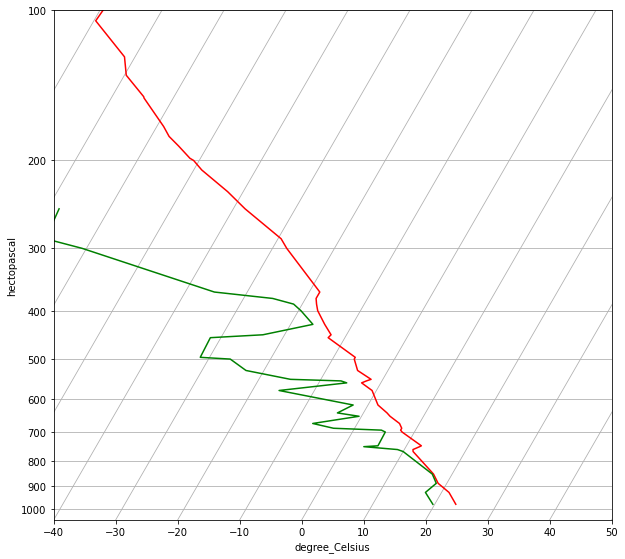

In [10]:
fig

ตอนนี้ควรต้องเซตค่าต่ำสุดสูงสุดในแต่ละแกน เพราะหากมีหลายช่วงเวลา จะได้นำมาเปรียบเทียบค่ากันได้

In [12]:
skew.ax.set_ylim(1000, 100)
skew.ax.set_xlim(-50, 40)

(-50.0, 40.0)

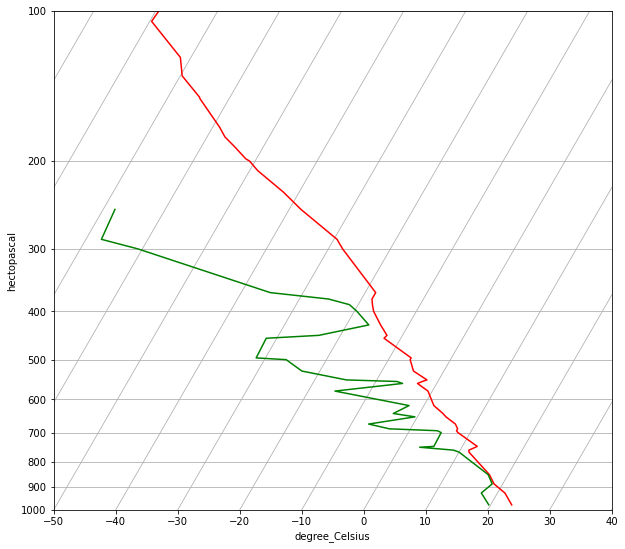

In [13]:
fig

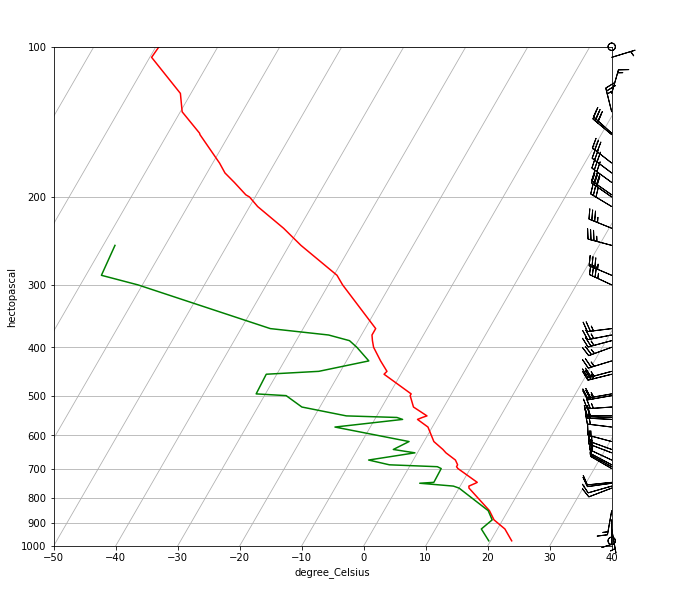

In [14]:
# พลอต wind barbs ในแกน y ข้างขวา
skew.plot_barbs(p, u, v)
fig

ลูกศรลมแสดงแล้ว แต่แน่นไป ต้องลดความหน่าแน่นลง

## 2.การลดความหนาแน่นในการแสดงผลของลูกศรลม wind barbs
โค้ดได้มาจาก metpy ยูทูป https://www.youtube.com/watch?v=b0RsN9mCY5k&list=PLQut5OXpV-0ir4IdllSt1iEZKTwFBa7kO&index=12

In [15]:
# ระหว่าง 100-200 hPa มีลูกศรลมมากเกินไป ต้องใช้เงื่อนไขในการ mask ข้อมูล
mask = p >= 100 * units.hPa

In [16]:
mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False])

True คือ ข้อมูลใน P ที่มีค่ามากกว่าหรือเท่ากับ 100 hPa ส่วน False นั้นมีค่าน้อยกว่า  
เราจะใช้ ผลลัพธ์บูลีนนี้ในการใช้ข้อมูลเพื่อแสดงลูกศรลม

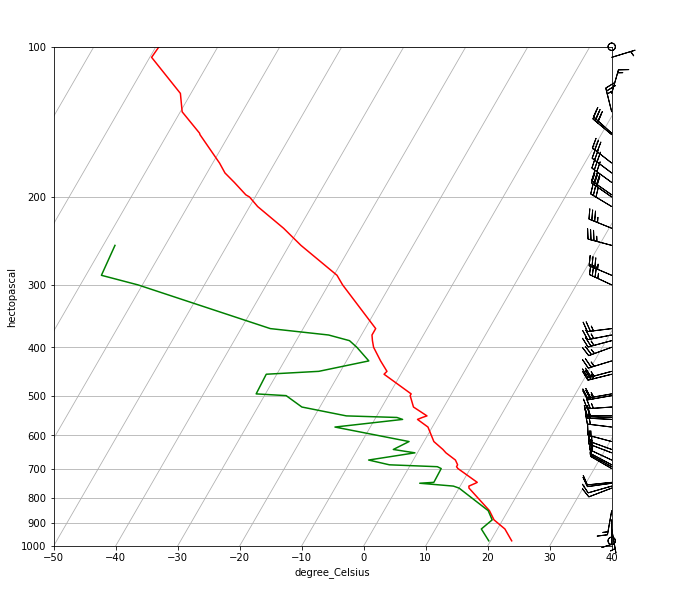

In [17]:
fig = plt.figure(figsize=(10,10))
skew = plots.SkewT(fig)

# พลอตความกดอากาศและอุณหภูมิ
skew.plot(p, T, 'red')

# พลอต Td หรือ อุณหภูมิจุดน้ำค้าง
skew.plot(p, Td, 'green')

skew.ax.set_ylim(1000, 100)
skew.ax.set_xlim(-50, 40)

# พลอต wind barbs ในแกน y ข้างขวา
skew.plot_barbs(p[mask], u[mask], v[mask]) #จะใช้ mask ตรงนี้ นั่นคือ True จะพลอตลูกศรลม ส่วน false จะไม่พลอต


เหมือนว่ายังไม่ได้ผล ลูกศรลมยังมีอยู่ ที่นี้จะใช้เทคนิคในการพลอตแบบข้ามข้อมูลบางค่าไป

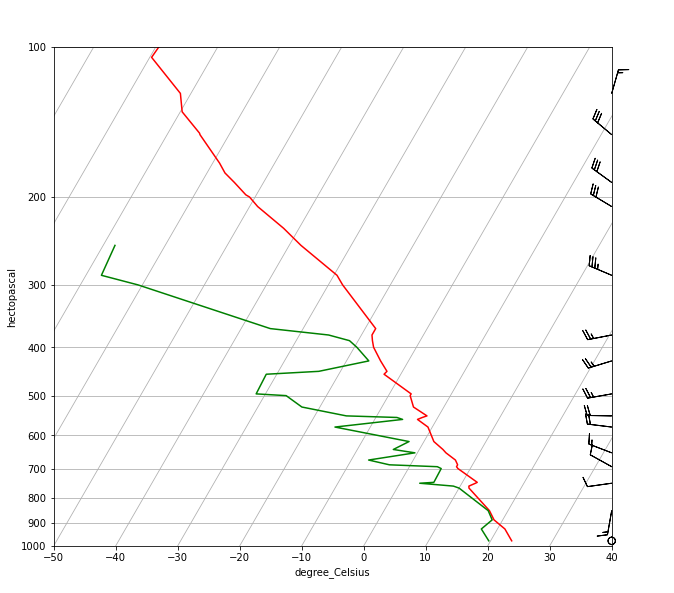

In [18]:
fig = plt.figure(figsize=(10,10))
skew = plots.SkewT(fig)

# พลอตความกดอากาศและอุณหภูมิ
skew.plot(p, T, 'red')

# พลอต Td หรือ อุณหภูมิจุดน้ำค้าง
skew.plot(p, Td, 'green')

skew.ax.set_ylim(1000, 100)
skew.ax.set_xlim(-50, 40)

# พลอต wind barbs ในแกน y ข้างขวา
skew.plot_barbs(p[mask][::3], u[mask][::3], v[mask][::3]) #พลอตลมทุกๆ 3 ค่า

ผลการลดความหนาแน่นลูกศรลมดีขึ้น แต่หากมีวิธีที่ metpy มีไว้ให้ในการ resampling ลูกศรลม

## resampling ลูกศรลมแบบ linear

In [19]:
import numpy as np
import metpy.calc as mpcalc

In [20]:
# กำหนดระยะที่ต้องการให้ลูกศรลมแสดง
interval = np.arange(100, 1000, 50) * units.hPa #50 คือระยะ hPa ที่ต้องการให้ลูกศรลมแสดง

In [21]:
interval

Magnitude,[100 150 200 250 300 350 400 450 500 550 600 650 700 750 800 850 900 950]
Units,hectopascal


In [23]:
# อินเด็กซ์ของลูกศรลมที่ต้องการพลอต ด้วยการประมาณค่าจาก interval
idx = mpcalc.resample_nn_1d(p, interval)

In [24]:
idx

[44, 39, 34, 31, 29, 28, 25, 22, 20, 18, 14, 12, 8, 6, 4, 3, 2, 1]

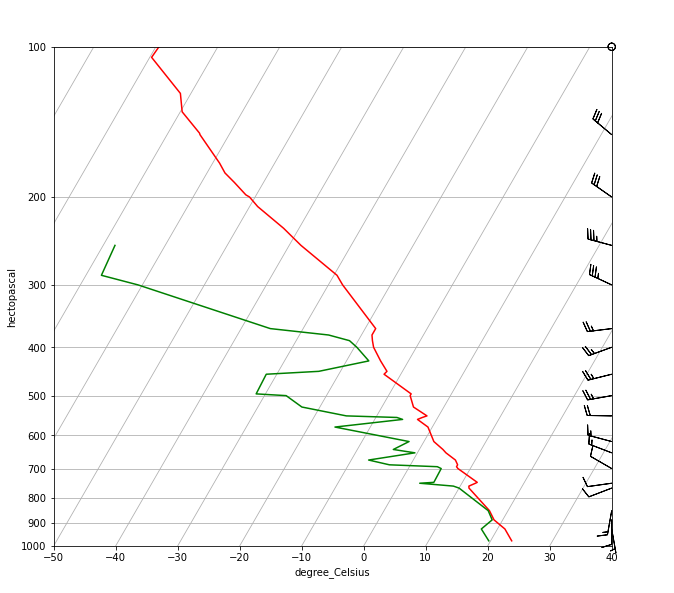

In [25]:
fig = plt.figure(figsize=(10,10))
skew = plots.SkewT(fig)

# พลอตความกดอากาศและอุณหภูมิ
skew.plot(p, T, 'red')

# พลอต Td หรือ อุณหภูมิจุดน้ำค้าง
skew.plot(p, Td, 'green')

skew.ax.set_ylim(1000, 100)
skew.ax.set_xlim(-50, 40)

# พลอต wind barbs ในแกน y ข้างขวา
skew.plot_barbs(p[idx], u[idx], v[idx]) #พลอตลมตามอินเด็กซ์ที่ได้ทำการ resample

เราได้ข้อมูลลมที่แสดงโดยลูกศรลม ที่ผ่านการประมาณค่าตามระดับความกดอากาศทุกๆ 50 hPa อย่างไรก็ตาม สังเกตุว่าระหว่าง 100-200 hPa ยังมีความห่างของลูกศรลม
เนื่องจากค่าที่เราได้นั้น เกิดจากการประมาณค่าแบบเชิงเส้น แต่เมื่อนำมาพลอตในแบบ logP จึงทำให้ลูกศรลมห่างไปในระดับดังกล่าว

ดังนั้น เราจึงต้องทำการประมาณค่าลม ตามความกดอากาศในแบบ log scale ใหม่

## resampling ลูกศรลมแบบ non-linear หรือ log scale

In [27]:
#np.logspace(100, 1000) #ดู docstring ให้ทดสอบฟังก์ชันก่อน จะพบว่าหากเราใส่ค่า 100 และ 1000 hPa จะทำให้ได้ค่าที่ error เนื่องจากมีค่าที่มากเกินไปของ log base 10
np.logspace(2, 3) # ทดสอบการใช้ฟังก์ชัน logspace 2,3 คือ ค่า 10**2 และ 10**3 

array([ 100.        ,  104.81131342,  109.8541142 ,  115.13953993,
        120.67926406,  126.48552169,  132.57113656,  138.94954944,
        145.63484775,  152.64179672,  159.98587196,  167.68329368,
        175.75106249,  184.20699693,  193.06977289,  202.35896477,
        212.09508879,  222.29964825,  232.99518105,  244.20530945,
        255.95479227,  268.26957953,  281.1768698 ,  294.70517026,
        308.88435965,  323.74575428,  339.32217719,  355.64803062,
        372.75937203,  390.69399371,  409.49150624,  429.19342601,
        449.8432669 ,  471.48663635,  494.17133613,  517.94746792,
        542.86754393,  568.9866029 ,  596.36233166,  625.05519253,
        655.12855686,  686.648845  ,  719.685673  ,  754.31200634,
        790.60432109,  828.64277285,  868.51137375,  910.29817799,
        954.09547635, 1000.        ])

In [29]:
# กำหนดระยะที่ต้องการให้ลูกศรลมแสดง
interval = np.logspace(2, 3) * units.hPa 
idx = mpcalc.resample_nn_1d(p, interval)

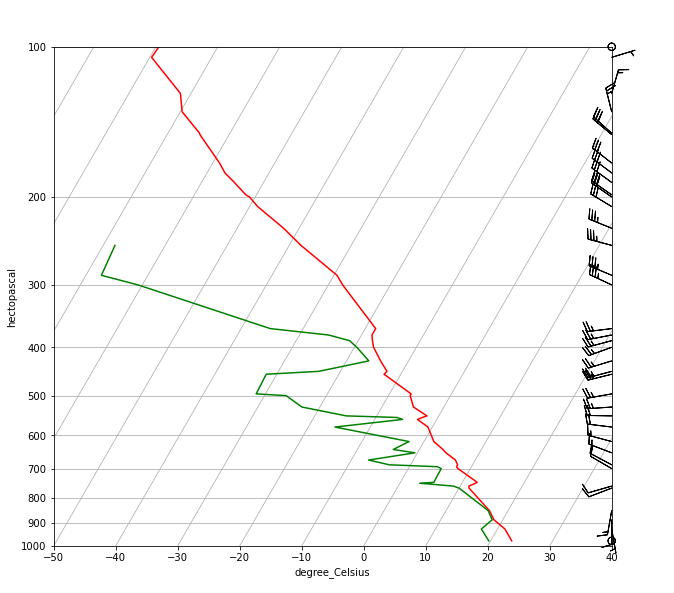

In [30]:
fig = plt.figure(figsize=(10,10))
skew = plots.SkewT(fig)

# พลอตความกดอากาศและอุณหภูมิ
skew.plot(p, T, 'red')

# พลอต Td หรือ อุณหภูมิจุดน้ำค้าง
skew.plot(p, Td, 'green')

skew.ax.set_ylim(1000, 100)
skew.ax.set_xlim(-50, 40)

# พลอต wind barbs ในแกน y ข้างขวา
skew.plot_barbs(p[idx], u[idx], v[idx]) #พลอตลมตามอินเด็กซ์ที่ได้ทำการ resample

สังเกตุว่าระยะ 100-200 hPa มีลูกศรลมแสดงเพิ่มเข้ามา เนื่องจากเราทำการประมาณค่าลมตาม log P 

## 3. พลอตเส้น Fiducial lines เข้ามา
นอกจากมีเส้น T และ Td แล้ว ยังมีเส้นอื่นๆ ได้แก่ dry adiabatic, moist adiabatic, mixing ratio (อัตราการปริมาณไอน้ำในอากาศต่อมวลอากาศแห้ง 1 กิโลกรัม g/kg) ที่จะนำไปใช้ในการคำนวณหาค่าไดนามิกส์อื่น เช่น CAPE, CIN, LCL, LFC, EL, Showalter index เป็นต้น

โค้ดจาก Metpy monday ยูทูป https://www.youtube.com/watch?v=quFXzaNbWXM&list=PLQut5OXpV-0ir4IdllSt1iEZKTwFBa7kO&index=13

    * ศึกษาเรื่อง Adiabatic จาก Dr.Kevin Perry https://www.youtube.com/watch?v=ziwv7N0zphY
    * ศึกษาเรื่อง CIN และ Stability indices จาก Dr.Kevin Perry https://www.youtube.com/watch?v=CfHeXwNIJGY

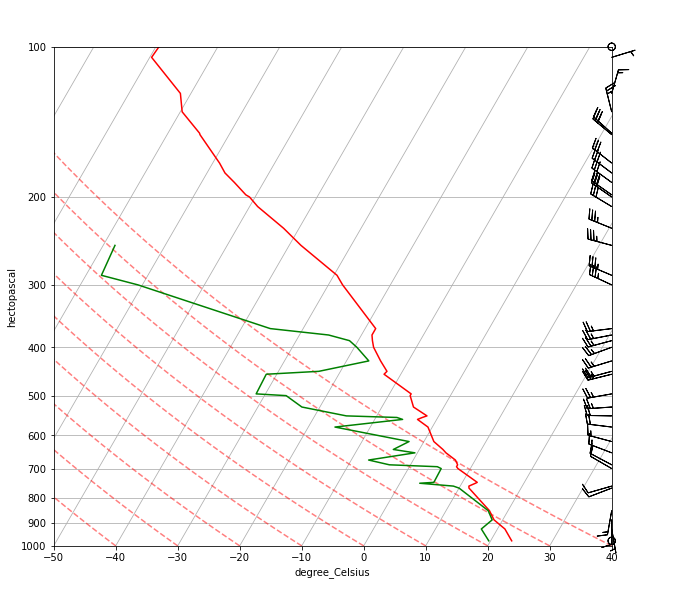

In [26]:
# พลอต dry adiabatic
skew.plot_dry_adiabats()
fig

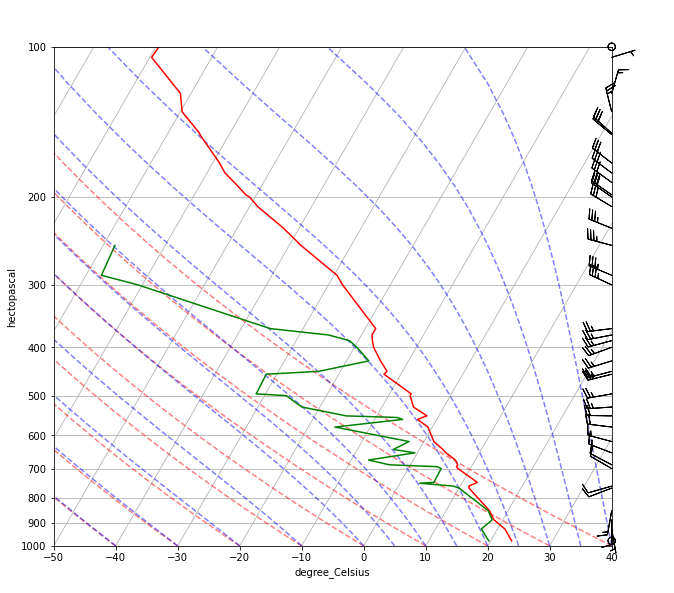

In [27]:
# พลอต moist adiabatic
skew.plot_moist_adiabats()
fig

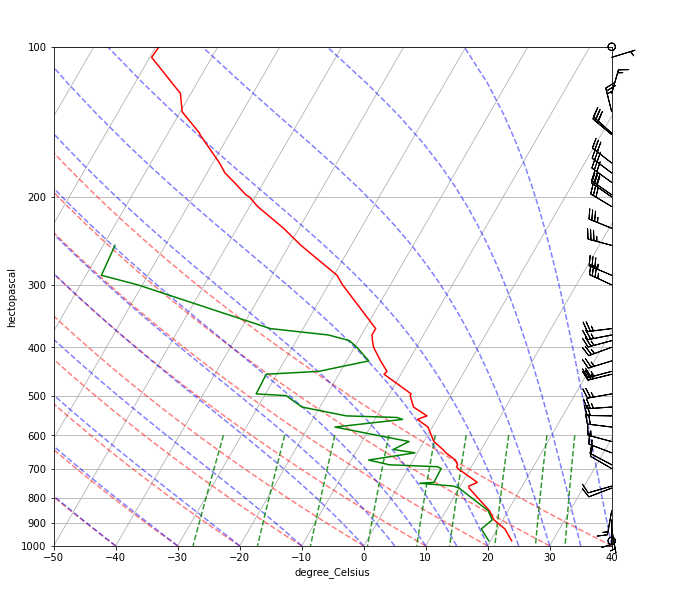

In [28]:
# พลอต mixing ratio
skew.plot_mixing_lines()
fig

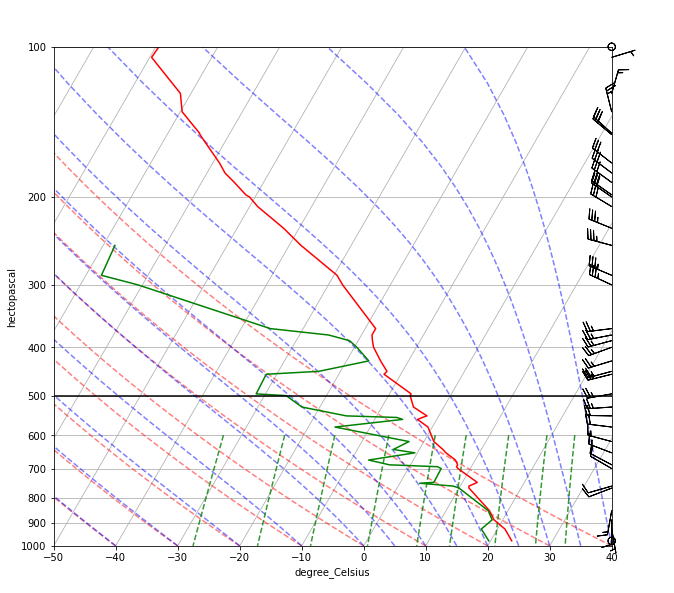

In [29]:
# เพิ่มเส้นหรือเน้นเส้นความกดอากาศพิเศษ เช่น ที่ระดับ 500 hPa
skew.ax.axhline(500 * units.hPa, color='k')
fig

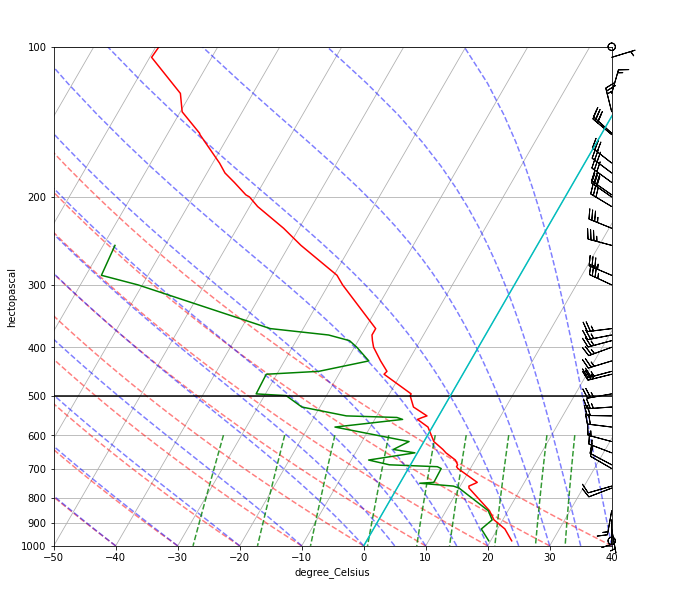

In [30]:
# เน้นเส้นอุณหภูมิที่ระดับ freezing level หรือ 0 celsius 
skew.ax.axvline(0* units.degC, color='c')
fig

ต่อไปจะทำการคำนวณเส้นทางของก้อนอากาศที่ยกตัวขึ้นไปในบรรยากาศด้านบน

## 4. คำนวณ parcel path ของก้อนอากาศแล้วทำการคำนวณค่า CAPE ที่แสดง positve bouyancy หรือแรงพยุงตัวก้อนอากาศที่เป็นบวก
โค้ดได้มาจาก Metpy monday https://www.youtube.com/watch?v=7QsBJTwuLvE&list=PLQut5OXpV-0ir4IdllSt1iEZKTwFBa7kO&index=14

In [31]:
parcel_path = mpcalc.parcel_profile(p, T[0], Td[0])

In [32]:
parcel_path

Magnitude,[296.54999999999995 291.966354896359 290.4547810948277 288.90231807187115 285.02922183397453 284.6813632171349 284.1769148927287 284.0238160024275 281.5665493790192 281.2297455914741 280.8888912942802 280.01837699719925 278.6912258547502 278.06681342983995 276.57630079074596 273.7822533500843 272.2756608431902 271.88633235158017 271.57103516768063 269.7725986321058 267.40188531402043 267.0338066972259 262.7608018856181 262.1136272286185 259.735966243289 256.52236145284525 254.92596446252807 253.5356371515907 251.9391132711825 240.42344138854403 237.77497190335686 229.37307547864808 224.52051909241695 218.40232018867098 215.73407048488298 215.12739231867596 211.69768445897486 209.10017082434322 206.41029767669355 198.8641122079351 198.48560777799142 192.98010142754632 188.35544337285717 179.61795952564057 177.13189097250276 166.78283962586116 163.03112831375853 160.2315512421168 159.97090696218999 159.38054332536055 158.4511847696138 156.13557918073184 148.85231120173373 145.30821887133115 143.4520357579688 143.3662262241581]
Units,kelvin


หน่วยอุณหภูมิเป็นเคลวิน ซึ่งไม่เป็นไร metpy สามารถจัดการหน่วยในการพลอต skewT/logP ได้

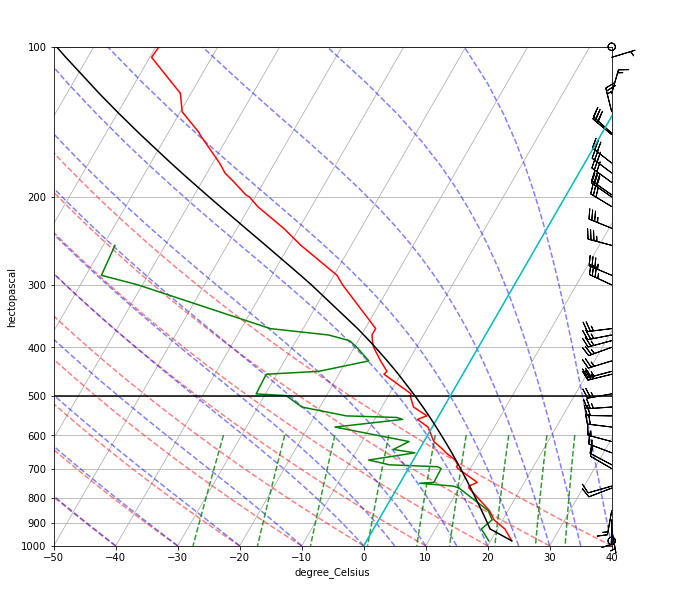

In [33]:
skew.plot(p, parcel_path, color='k')
fig

เส้นสีดำแสดงของ parcel path ที่ยกตัวขึ้นไปในบรรยากาศด้านบน ที่ต้องแรกยกตัวตามเส้น dry adiabatic lapse rate 
และเมื่อถึงจุดที่เกิดการกลั่นตัวหรือ ฐานเมฆในที่นี้เรียกว่าระดับ LCL (Lifting condensation level) จึงเกิดการยกตัวขึ้นไป ตามเส้นของ moist adiabatic lapse rate 
ที่มีการลดลงของอุณหภูมิตามความสูงที่น้อยกว่าเมื่อเทียบกับ dry adiabatic lapse rate โดยก้อนอากาศจะยกตัวไปจนถึง equilibrium level หรือ EL

พื้นที่ระหว่างเส้นสีแดงที่เป็นอุณหภูมิของก้อนอากาศหรือ parcel กับเส้นสีดำ แสดงถึงพลังงานที่มีอยู่ของก้อนอากาศที่จะสามารถยกตัวขึ้นไปได้
ในที่นี้คือ CAPE หรือ Convective available potential energy หากมีพื้นที่มากแสดงว่ามีค่า CAPE ที่มาก มักแสดงถึงสภาวะของบรรยกาศที่สนับสนุนให้เกิดเมฆฝนฟ้าคะนอง
ที่รุนแรงขึ้นมาได้

    * ศึกษาเรื่อง CAPE ได้จาก Dr.Kevin Perry https://www.youtube.com/watch?v=jCfjZ4jJGT0
    * ศึกษาเรือง LCL ได้จาก Dr.Kevin Perry  https://www.youtube.com/watch?v=J9VUUZPMpbw


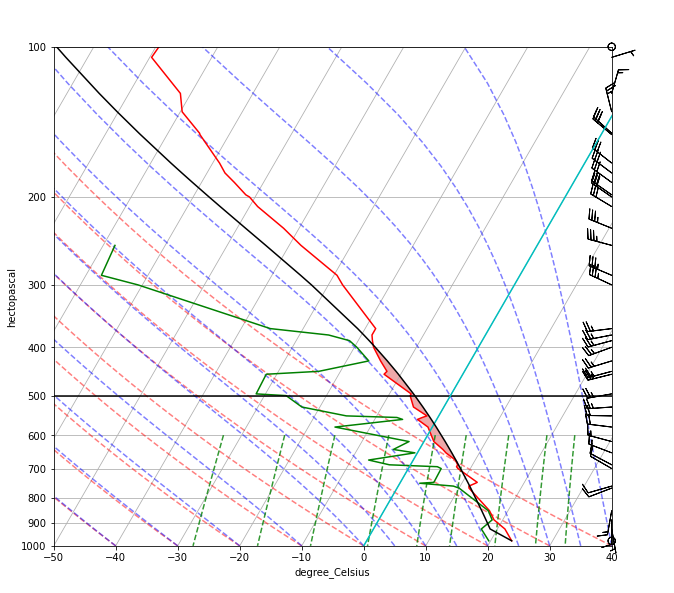

In [34]:
# ทำการแรเงาพื้นที่ CAPE
skew.shade_cape(p, T, parcel_path)
fig

CIN (Convective inhibition) หรือ  เป็นอีกพื้นที่หนึ่งที่แสดงถึง ค่าพลังงานที่ไม่ยอมให้ก้อนอากาศเกิดการยกตัว อ่าน https://en.wikipedia.org/wiki/Convective_inhibition

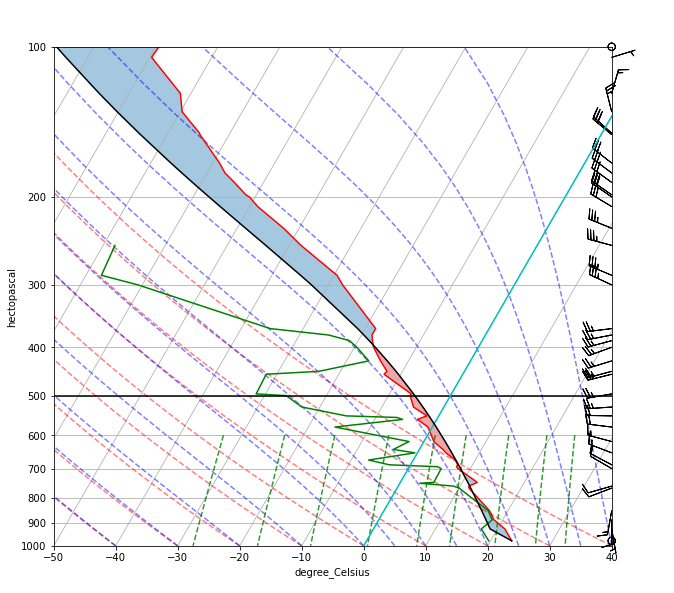

In [35]:
# ทำการแรเงาพื้นที่ CIN
skew.shade_cin(p, T,  parcel_path)
fig

สังเกตุว่ามี CIN อยู่สองบริเวณ นั่นคือในช่วงต้นของชั้นบรรยากาศและช่วงปลาย เนื่องจากเส้นสีดำ ที่แสดงถึงอุณหภูมิของก้อนอากาศมีค่าอัตราการลดลงหรือ lapse rate ที่น้อยกว่าหรือต่ำกว่าอุณหภูมิของสิ่งแวดล้อมหรือ T ทำให้เกิดสภาวะเสถียรภาพของบรรยากาศ หรือ stable ก้อนอากาศในช่วงระดับความกดดังกล่าวจึงมีลักษณะการจมตัวลงมา 

### สิ่งที่นิสิตควรศึกษา

การนำเทอร์โมไดนามิกส์ไดอะแกรมนี้ไปใช้ศึกษาสภาพอากาศที่รุนแรง เช่น พายุลูกเห็บ พายุฤดูร้อน พายุฝนฟ้าคะนอง จำเป็นที่จะต้องศึกษาหลักการคิด หลักการคำนวณค่าพารามิเตอร์ดังต่อไปนี้

* การคำนวณค่า LCL, LFC, EL จากลิงก์ยูทูป metpy monday https://www.youtube.com/watch?v=kGljsludKtk&list=PLQut5OXpV-0ir4IdllSt1iEZKTwFBa7kO&index=16
    
* การคำนวณค่า CAPEและค่า CIN จากลิงก์ยูทูป metpy monday https://www.youtube.com/watch?v=EJfsaPjQ1RU&list=PLQut5OXpV-0ir4IdllSt1iEZKTwFBa7kO&index=17

* สอนการทำ Hodograph เพื่อวิเคราะห์ windshear จากลิงก์ยูทูป metpy monday https://www.youtube.com/watch?v=c0Uc7imDNv0&list=PLQut5OXpV-0ir4IdllSt1iEZKTwFBa7kO&index=32
    
### code ไดอะแกรม skew-T/logP ที่มี Hodograph ที่แสดงทิศทางและความเร็วลมในแต่ละระดับ
* จาก metpy เวป https://unidata.github.io/MetPy/latest/examples/plots/Skew-T_Layout.html#
* อีกรูปแบบของ hodograph ใน skew-T/logP จาก metpy เวป  https://unidata.github.io/MetPy/latest/examples/plots/Hodograph_Inset.html
* โค้ดพลอต sounding อย่างง่าย https://unidata.github.io/MetPy/latest/examples/plots/Simple_Sounding.html

## งานมอบหมายนิสิต
1. ค้นหาข่าวพายุฤดูร้อนหรือพายุลูกเห็บในเชียงใหม่ เพื่อระบุวันที่มีเหตุการณ์รุนแรงดังกล่าว ให้นิสิตหาอย่างน้อยทั้งสองวัน
2. พลอต skew-T/ logP เพื่อดูค่าเทอร์โมไดนามิกส์ CAPE/CIN/LCL/LFC/EL
3. เปรียบเทียบค่า CAPE/CIN/LCL/LFC/EL ด้วยสายตา ของเหตุการณ์ทั้งสองวันที่เลือกมา ว่าวันไหนมีความรุนแรงมากกว่ากัน